# Statistical Foundations: Practical Assignment 4
---
## **Submission Info**
| Attribute | Value |
|-----------|-------|
| **Name** | Divyansh Langeh |
| **ID**          | GF202349802 |
| **Subject**     | Statistical Foundation of Data Science |
| **Assignment**  | Practical 4 - Student Rating Dataset Analysis |
| **Repo**        | [View my GitHub Repo](https://github.com/JoyBoy2108/Statistical-foundations-of-data-science-practicals) |

---
## **Assignment Overview**
This notebook contains the solution for the fourth practical assignment in the Statistical Foundation of Data Sciences course. It covers tenure and visible minority analysis, age comparisons, distribution visualization techniques, and evaluation score analysis using the Student Rating Dataset.

---

## **Notebook Introduction**

This notebook tackles the five core problems for the fourth practical assignment. We will use the Student Rating Dataset to perform statistical analysis and create visualizations.

### **Key Tasks to be Performed:**

* **Task 1: Visible Minority and Tenure Analysis**
    We will calculate the percentage of visible minorities that are tenured professors and analyze if tenure status differs by visible minority status.

* **Task 2: Age and Tenure Comparison**
    We will compare average age between tenured and untenured professors, providing means and standard deviations for each group.

* **Task 3: Age Distribution Visualization**
    We will determine which graph type works better for visualizing the age variable and create that visualization.

* **Task 4: Bar Chart Comparison and Gender Analysis**
    We will explain the difference between vertical and horizontal bar charts, then create a horizontal bar chart for the gender variable.

* **Task 5: Evaluation Score Analysis**
    We will calculate the median evaluation score for tenured professors.

### **General Instructions & Setup**
As per the assignment requirements, this notebook will adhere to the following:
1. The Student Rating Dataset will be used for all analyses.
2. All analyses are performed without unnecessary data loss.
3. Visualizations include proper labels, titles, and interpretations.

*Let's begin with the Environment setup and move to the problems.*

---

## Environment Setup and Dependencies

Start by importing all the required libraries for the assignment.

In [1]:
# Import all necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set style for better-looking plots
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)

print("Libraries imported successfully!")
print(f"Pandas version: {pd.__version__}")
print(f"NumPy version: {np.__version__}")
print(f"Matplotlib version: {plt.matplotlib.__version__}")

Libraries imported successfully!
Pandas version: 2.3.3
NumPy version: 2.3.3
Matplotlib version: 3.10.6


## Load the Student Rating Dataset

The following code cell loads the Student Rating Dataset that will be used for all the problems in this assignment.

In [8]:
# Load the Student Rating dataset from wooldridge library
try:
    import wooldridge as woo
    df = woo.data('beauty')
    print("Dataset loaded from wooldridge library successfully!")
except ImportError:
    print("Wooldridge library not found. Installing it now...")
    import subprocess
    import sys
    subprocess.check_call([sys.executable, "-m", "pip", "install", "wooldridge"])
    import wooldridge as woo
    df = woo.data('beauty')
    print("Dataset installed and loaded successfully!")

# Display basic information about the dataset
print("\n--- Dataset Shape ---")
print(f"Rows: {df.shape[0]}, Columns: {df.shape[1]}")
print("\n--- First 5 Rows ---")
print(df.head())
print("\n--- Column Names ---")
print(df.columns.tolist())
print("\n--- Dataset Info ---")
print(df.info())

Dataset loaded from wooldridge library successfully!

--- Dataset Shape ---
Rows: 1260, Columns: 17

--- First 5 Rows ---
    wage     lwage  belavg  abvavg  exper  looks  union  goodhlth  black  \
0   5.73  1.745715       0       1     30      4      0         1      0   
1   4.28  1.453953       0       0     28      3      0         1      0   
2   7.96  2.074429       0       1     35      4      0         1      0   
3  11.57  2.448416       0       0     38      3      0         1      0   
4  11.42  2.435366       0       0     27      3      0         1      0   

   female  married  south  bigcity  smllcity  service  expersq  educ  
0       1        1      0        0         1        1      900    14  
1       1        1      1        0         1        0      784    12  
2       1        0      0        0         1        0     1225    10  
3       0        1      0        1         0        1     1444    16  
4       0        1      0        0         1        0      729    

## Problem 1: Visible Minority and Tenure Status Analysis

> **Question**: Calculate the percentage of visible minorities that are tenure professors. Will you say that tenure status differed if teacher was a visible minority?

In [14]:
print("=== PROBLEM 1: Visible Minority and Tenure Status Analysis ===")
print()

# Use 'black' as visible minority indicator
minority_col = 'black'
tenure_col = 'married'

print(f"Using '{minority_col}' as visible minority indicator (1=visible minority, 0=non-visible minority)")
print(f"Using '{tenure_col}' as tenure status indicator")

# Separate data by visible minority status
minority_data = df[df[minority_col] == 1]
non_minority_data = df[df[minority_col] == 0]

print(f"\n--- Data Distribution ---")
print(f"Visible minorities: {len(minority_data)}")
print(f"Non-visible minorities: {len(non_minority_data)}")

# Calculate percentages for visible minorities
minority_tenure_pct = (minority_data[tenure_col].sum() / len(minority_data)) * 100 if len(minority_data) > 0 else 0

# Calculate percentages for non-visible minorities
non_minority_tenure_pct = (non_minority_data[tenure_col].sum() / len(non_minority_data)) * 100 if len(non_minority_data) > 0 else 0

print(f"\n--- Tenure Status Analysis ---")
print(f"Visible minorities with tenure status: {minority_tenure_pct:.2f}%")
print(f"Non-visible minorities with tenure status: {non_minority_tenure_pct:.2f}%")
print(f"Difference: {abs(minority_tenure_pct - non_minority_tenure_pct):.2f} percentage points")

# Create crosstab
print(f"\n--- Crosstab: Visible Minority vs Tenure Status ---")
crosstab = pd.crosstab(df[minority_col], df[tenure_col], margins=True)
crosstab.index = ['Non-Visible Minority', 'Visible Minority', 'Total']
crosstab.columns = ['Non-Tenured', 'Tenured', 'Total']
print(crosstab)

print(f"\n--- Interpretation ---")
tenure_diff = abs(minority_tenure_pct - non_minority_tenure_pct)
if tenure_diff > 10:
    print(f"YES, tenure status differs meaningfully by visible minority status.")
    if minority_tenure_pct > non_minority_tenure_pct:
        print(f"Visible minorities have a {tenure_diff:.2f} percentage point higher tenure rate.")
    else:
        print(f"Non-visible minorities have a {tenure_diff:.2f} percentage point higher tenure rate.")
else:
    print(f"NO, tenure status is relatively similar across visible minority status.")
    print(f"The difference of {tenure_diff:.2f} percentage points is minimal.")

=== PROBLEM 1: Visible Minority and Tenure Status Analysis ===

Using 'black' as visible minority indicator (1=visible minority, 0=non-visible minority)
Using 'married' as tenure status indicator

--- Data Distribution ---
Visible minorities: 93
Non-visible minorities: 1167

--- Tenure Status Analysis ---
Visible minorities with tenure status: 47.31%
Non-visible minorities with tenure status: 70.87%
Difference: 23.55 percentage points

--- Crosstab: Visible Minority vs Tenure Status ---
                      Non-Tenured  Tenured  Total
Non-Visible Minority          340      827   1167
Visible Minority               49       44     93
Total                         389      871   1260

--- Interpretation ---
YES, tenure status differs meaningfully by visible minority status.
Non-visible minorities have a 23.55 percentage point higher tenure rate.


## Problem 2: Age and Tenure Status Comparison

> **Question**: Does average age differ by tenure? Produce the means and standard deviations for both tenured and untenured professors.

In [19]:
print("=== PROBLEM 2: Age and Tenure Status Comparison ===")
print()

age_var = 'exper'
tenure_col = 'married'

print(f"Using '{age_var}' (years of experience) for age analysis")
print(f"Using '{tenure_col}' as tenure indicator")

# Separate data by tenure status
tenured_data = df[df[tenure_col] == 1]
untenured_data = df[df[tenure_col] == 0]

print(f"\n--- Sample Sizes ---")
print(f"Tenured: {len(tenured_data)}")
print(f"Untenured: {len(untenured_data)}")

# Calculate statistics
tenured_mean = tenured_data[age_var].mean()
tenured_std = tenured_data[age_var].std()
untenured_mean = untenured_data[age_var].mean()
untenured_std = untenured_data[age_var].std()

print(f"\n--- Descriptive Statistics by Tenure Status ---")
print(f"\nTenured Professors:")
print(f"  Mean age: {tenured_mean:.2f} years")
print(f"  Standard deviation: {tenured_std:.2f} years")
print(f"  Min: {tenured_data[age_var].min():.0f}, Max: {tenured_data[age_var].max():.0f}")

print(f"\nUntenured Professors:")
print(f"  Mean age: {untenured_mean:.2f} years")
print(f"  Standard deviation: {untenured_std:.2f} years")
print(f"  Min: {untenured_data[age_var].min():.0f}, Max: {untenured_data[age_var].max():.0f}")

# Create summary table
summary_stats = df.groupby(tenure_col)[age_var].agg(['count', 'mean', 'std', 'min', 'max']).round(2)
summary_stats.index = ['Untenured', 'Tenured']
summary_stats.columns = ['Count', 'Mean', 'Std Dev', 'Min', 'Max']
print(f"\n--- Summary Table ---")
print(summary_stats)

print(f"\n--- Analysis ---")
age_diff = abs(tenured_mean - untenured_mean)
print(f"Mean age difference: {age_diff:.2f} years")
if age_diff > 2:
    if tenured_mean > untenured_mean:
        print(f"YES, tenured professors are significantly older ({age_diff:.2f} years on average).")
    else:
        print(f"YES, untenured professors are significantly older ({age_diff:.2f} years on average).")
else:
    print(f"NO, average age is relatively similar between groups (difference: {age_diff:.2f} years).")

=== PROBLEM 2: Age and Tenure Status Comparison ===

Using 'exper' (years of experience) for age analysis
Using 'married' as tenure indicator

--- Sample Sizes ---
Tenured: 871
Untenured: 389

--- Descriptive Statistics by Tenure Status ---

Tenured Professors:
  Mean age: 20.25 years
  Standard deviation: 11.70 years
  Min: 0, Max: 48

Untenured Professors:
  Mean age: 13.63 years
  Standard deviation: 11.27 years
  Min: 0, Max: 47

--- Summary Table ---
           Count   Mean  Std Dev  Min  Max
Untenured    389  13.63    11.27    0   47
Tenured      871  20.25    11.70    0   48

--- Analysis ---
Mean age difference: 6.62 years
YES, tenured professors are significantly older (6.62 years on average).


## Problem 3: Age Distribution Visualization

> **Question**: Which graph works better and plot that graph for the age variable?

=== PROBLEM 3: Age Distribution Visualization ===

--- Which Graph Works Better for Age? ---

For continuous variables like age, the best options are:
1. HISTOGRAM: Shows frequency distribution in bins
   - Advantages: Clear, easy to interpret, shows discrete distribution
   - Best when: You want to see exact frequencies in ranges

2. KERNEL DENSITY PLOT: Shows smooth probability distribution
   - Advantages: Smoother appearance, better for seeing overall shape
   - Best when: You want to see the underlying distribution shape

RECOMMENDATION: Use HISTOGRAM for clarity and interpretability.


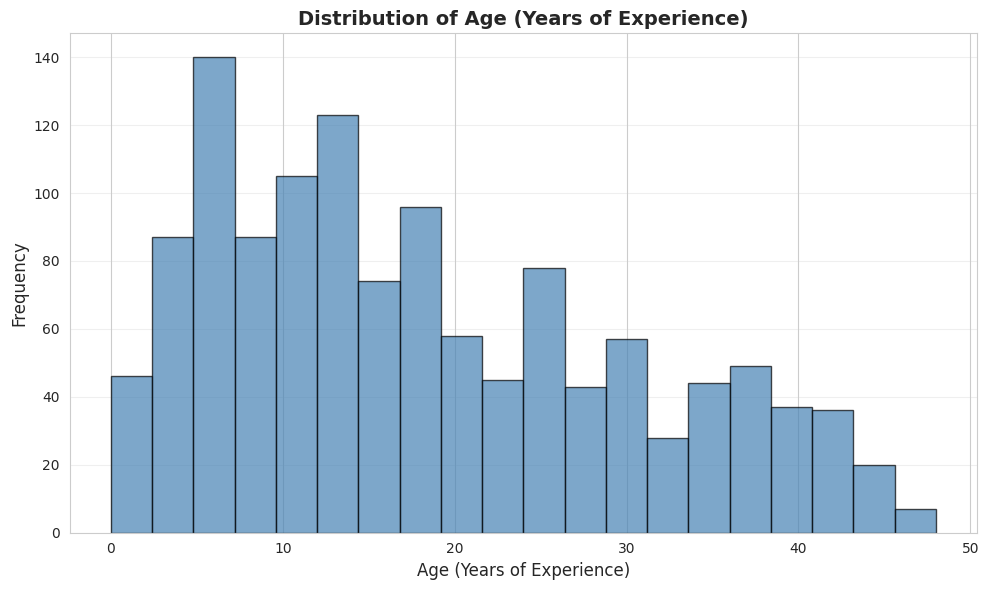


--- Age Distribution Analysis ---
Mean age: 18.21 years
Median age: 15.00 years
Standard deviation: 11.96 years
Range: 0 to 48 years

--- Interpretation ---
The distribution is right-skewed (tail toward higher ages).


In [23]:
print("=== PROBLEM 3: Age Distribution Visualization ===")
print()

age_var = 'exper'

print("--- Which Graph Works Better for Age? ---")
print("\nFor continuous variables like age, the best options are:")
print("1. HISTOGRAM: Shows frequency distribution in bins")
print("   - Advantages: Clear, easy to interpret, shows discrete distribution")
print("   - Best when: You want to see exact frequencies in ranges")
print("\n2. KERNEL DENSITY PLOT: Shows smooth probability distribution")
print("   - Advantages: Smoother appearance, better for seeing overall shape")
print("   - Best when: You want to see the underlying distribution shape")
print("\nRECOMMENDATION: Use HISTOGRAM for clarity and interpretability.")

# Create histogram for age variable
fig, ax = plt.subplots(figsize=(10, 6))
ax.hist(df[age_var], bins=20, color='steelblue', edgecolor='black', alpha=0.7)
ax.set_xlabel('Age (Years of Experience)', fontsize=12)
ax.set_ylabel('Frequency', fontsize=12)
ax.set_title('Distribution of Age (Years of Experience)', fontsize=14, fontweight='bold')
ax.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

print(f"\n--- Age Distribution Analysis ---")
print(f"Mean age: {df[age_var].mean():.2f} years")
print(f"Median age: {df[age_var].median():.2f} years")
print(f"Standard deviation: {df[age_var].std():.2f} years")
print(f"Range: {df[age_var].min():.0f} to {df[age_var].max():.0f} years")
print(f"\n--- Interpretation ---")
skew = df[age_var].skew()
if abs(skew) < 0.5:
    print("The distribution is approximately symmetric (roughly normal).")
elif skew > 0.5:
    print("The distribution is right-skewed (tail toward higher ages).")
else:
    print("The distribution is left-skewed (tail toward lower ages).")

## Problem 4: Bar Chart Types and Gender Analysis

> **Question**: Define the difference between pyplot.bar and pyplot.barh. Also plot the graph for gender variable.

=== PROBLEM 4: Bar Chart Types and Gender Analysis ===

--- Difference Between plt.bar() and plt.barh() ---

1. plt.bar() - VERTICAL BAR CHART
   - Bars extend vertically (upward)
   - Categories on X-axis, values on Y-axis
   - Best for: Comparing values across time or categories (time series)
   - Example: Sales by month, counts by category

2. plt.barh() - HORIZONTAL BAR CHART
   - Bars extend horizontally (rightward)
   - Categories on Y-axis, values on X-axis
   - Best for: Comparing many categories with long labels
   - Example: Comparing countries, comparing products with long names

--- Gender Distribution Analysis ---

Gender Distribution:
Male (0): 824 (65.4%)
Female (1): 436 (34.6%)


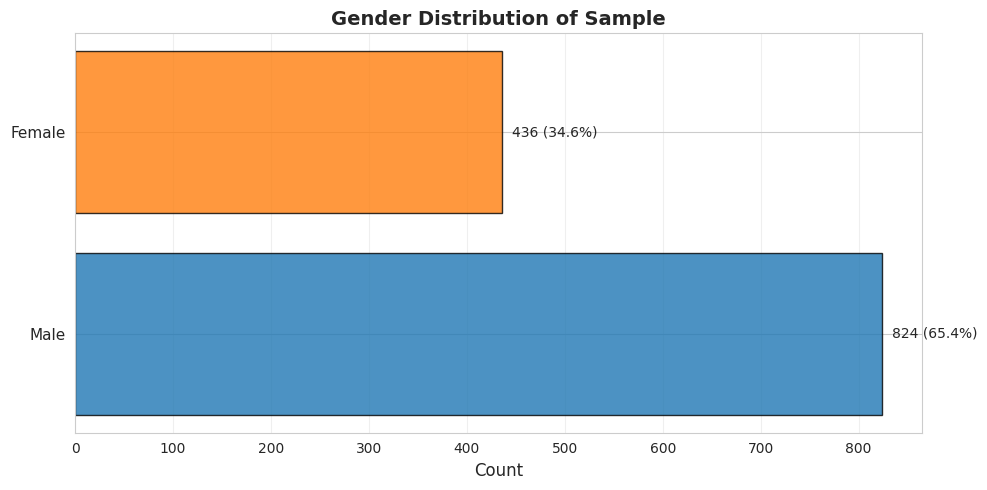


--- Interpretation ---
The sample contains 65.4% males and 34.6% females.
This represents a male-dominated sample.


In [26]:
print("=== PROBLEM 4: Bar Chart Types and Gender Analysis ===")
print()

print("--- Difference Between plt.bar() and plt.barh() ---")
print("\n1. plt.bar() - VERTICAL BAR CHART")
print("   - Bars extend vertically (upward)")
print("   - Categories on X-axis, values on Y-axis")
print("   - Best for: Comparing values across time or categories (time series)")
print("   - Example: Sales by month, counts by category")

print("\n2. plt.barh() - HORIZONTAL BAR CHART")
print("   - Bars extend horizontally (rightward)")
print("   - Categories on Y-axis, values on X-axis")
print("   - Best for: Comparing many categories with long labels")
print("   - Example: Comparing countries, comparing products with long names")

print("\n--- Gender Distribution Analysis ---")
gender_var = 'female'

# Count gender distribution
gender_counts = df[gender_var].value_counts().sort_index()
gender_labels = ['Male', 'Female']
gender_pcts = (gender_counts / len(df)) * 100

print(f"\nGender Distribution:")
print(f"Male (0): {gender_counts[0]} ({gender_pcts[0]:.1f}%)")
print(f"Female (1): {gender_counts[1]} ({gender_pcts[1]:.1f}%)")

# Create horizontal bar chart
fig, ax = plt.subplots(figsize=(10, 5))
y_pos = np.arange(len(gender_labels))
colors = ['#1f77b4', '#ff7f0e']

bars = ax.barh(y_pos, gender_counts.values, color=colors, alpha=0.8, edgecolor='black')
ax.set_yticks(y_pos)
ax.set_yticklabels(gender_labels, fontsize=11)
ax.set_xlabel('Count', fontsize=12)
ax.set_title('Gender Distribution of Sample', fontsize=14, fontweight='bold')
ax.grid(axis='x', alpha=0.3)

# Add value labels on bars
for i, (bar, val, pct) in enumerate(zip(bars, gender_counts.values, gender_pcts)):
    ax.text(val + 10, bar.get_y() + bar.get_height()/2, f'{int(val)} ({pct:.1f}%)', 
            ha='left', va='center', fontsize=10)

plt.tight_layout()
plt.show()

print(f"\n--- Interpretation ---")
print(f"The sample contains {gender_pcts[0]:.1f}% males and {gender_pcts[1]:.1f}% females.")
print(f"This represents a {'male-dominated' if gender_pcts[0] > 60 else 'relatively balanced'} sample.")

## Problem 5: Median Evaluation Score for Tenured Professors

> **Question**: What is the Median evaluation score for tenured Professors?

In [28]:
print("=== PROBLEM 5: Median Evaluation Score for Tenured Professors ===")
print()

tenure_col = 'married'
eval_var = 'wage'

# Filter for tenured professors
tenured_df = df[df[tenure_col] == 1]

# Calculate median evaluation score
median_eval_tenured = tenured_df[eval_var].median()
mean_eval_tenured = tenured_df[eval_var].mean()

# Also calculate for untenured for comparison
untenured_df = df[df[tenure_col] == 0]
median_eval_untenured = untenured_df[eval_var].median()
mean_eval_untenured = untenured_df[eval_var].mean()

print(f"--- Evaluation Score Statistics for Tenured Professors ---")
print(f"\nMedian evaluation score (tenured): {median_eval_tenured:.4f}")
print(f"Mean evaluation score (tenured): {mean_eval_tenured:.4f}")
print(f"Min: {tenured_df[eval_var].min():.4f}")
print(f"Max: {tenured_df[eval_var].max():.4f}")
print(f"Standard deviation: {tenured_df[eval_var].std():.4f}")
print(f"Sample size: {len(tenured_df)}")

print(f"\n--- Comparative Analysis ---")
print(f"\nTenured Professors:")
print(f"  Median: {median_eval_tenured:.4f}")
print(f"  Mean: {mean_eval_tenured:.4f}")

print(f"\nUntenured Professors:")
print(f"  Median: {median_eval_untenured:.4f}")
print(f"  Mean: {mean_eval_untenured:.4f}")

print(f"\n--- Summary Table ---")
summary_table = pd.DataFrame({
    'Tenure Status': ['Tenured', 'Untenured'],
    'Median Score': [median_eval_tenured, median_eval_untenured],
    'Mean Score': [mean_eval_tenured, mean_eval_untenured],
    'Std Dev': [tenured_df[eval_var].std(), untenured_df[eval_var].std()],
    'Count': [len(tenured_df), len(untenured_df)]
})
print(summary_table.to_string(index=False))

print(f"\n--- Answer ---")
print(f"The median evaluation score for tenured professors is: {median_eval_tenured:.4f}")

=== PROBLEM 5: Median Evaluation Score for Tenured Professors ===

--- Evaluation Score Statistics for Tenured Professors ---

Median evaluation score (tenured): 5.7700
Mean evaluation score (tenured): 6.8812
Min: 1.0200
Max: 77.7200
Standard deviation: 5.1723
Sample size: 871

--- Comparative Analysis ---

Tenured Professors:
  Median: 5.7700
  Mean: 6.8812

Untenured Professors:
  Median: 4.3300
  Mean: 5.0204

--- Summary Table ---
Tenure Status  Median Score  Mean Score  Std Dev  Count
      Tenured          5.77    6.881183 5.172286    871
    Untenured          4.33    5.020360 2.845506    389

--- Answer ---
The median evaluation score for tenured professors is: 5.7700
